In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)  # FutureWarningを消している

In [2]:
import geopandas as gpd
import osmnx as ox

ox.__version__  # バージョンを表示

'1.9.4'

In [3]:
import matplotlib.pyplot as plt

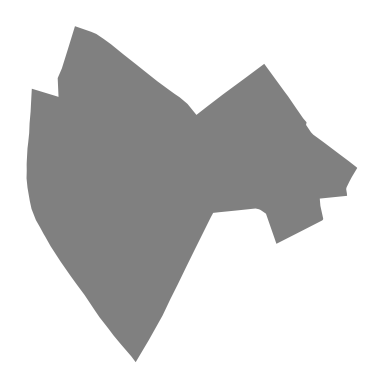

In [29]:
# 渋谷の境界ポリゴンを取得し、投影して表示
city = ox.geocode_to_gdf("渋谷, 東京, 日本")
city_proj = ox.projection.project_gdf(city)
ax = city_proj.plot(fc="gray", ec="none")
_ = ax.axis("off")

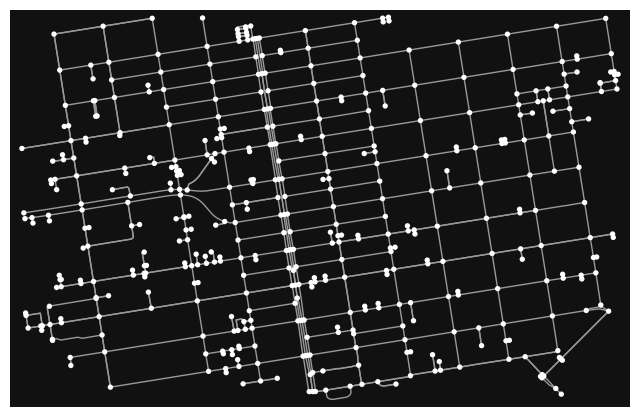

In [31]:
# define a bounding box in San Francisco
bbox = 37.79, 37.78, -122.41, -122.43

# create network from that bounding box
G = ox.graph_from_bbox(bbox=bbox, network_type="drive_service")
ox.plot_graph(G)
plt.show()

In [40]:
# get all building footprints in some neighborhood
place = "渋谷, 東京, 日本"
tags = {"building": True}
gdf = ox.features_from_place(place, tags)
gdf.shape

(833, 96)

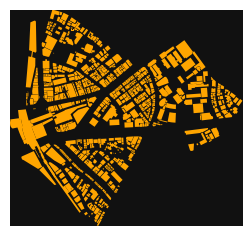

In [41]:

fig, ax = ox.plot_footprints(gdf, figsize=(3, 3))

In [37]:

# get all parks and bus stops in some neighborhood
tags = {"leisure": "park", "highway": "bus_stop"}
gdf = ox.features_from_place(place, tags)
gdf.shape

(30, 50)

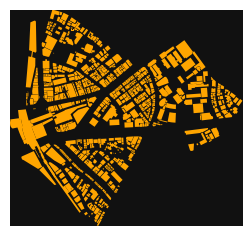

In [42]:
fig, ax = ox.plot_footprints(gdf, figsize=(3, 3))

In [45]:

# network from address, including only nodes within 1km along the network from the address
G = ox.graph_from_address(
    address="350 5th Ave, New York, NY",
    dist=1000,
    dist_type="network",
    network_type="drive",
)

# you can project the network to UTM (zone calculated automatically)
G_projected = ox.project_graph(G)

In [46]:
# create the street network within the city of Piedmont's borders
G = ox.graph_from_place("Piedmont, California, USA", network_type="drive")

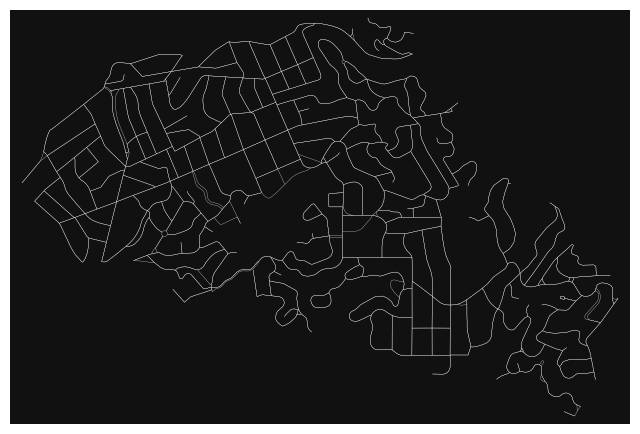

In [47]:
# save to disk as GeoPackage file then plot
ox.save_graph_geopackage(G)
fig, ax = ox.plot_graph(G, node_size=0, edge_color="w", edge_linewidth=0.2)

In [8]:
# turn response caching off
ox.settings.use_cache = False

# turn it back on and turn on/off logging to your console
ox.settings.use_cache = True
ox.settings.log_console = False

In [9]:
# define a bounding box in San Francisco
bbox = 37.79, 37.78, -122.41, -122.43

# create network from that bounding box
G = ox.graph_from_bbox(bbox=bbox, network_type="drive_service")

In [10]:

# define a point at the corner of California St and Mason St in SF
location_point = (37.791427, -122.410018)

# create network from point, inside bounding box of N, S, E, W each 750m from point
G = ox.graph_from_point(location_point, dist=750, dist_type="bbox", network_type="drive")

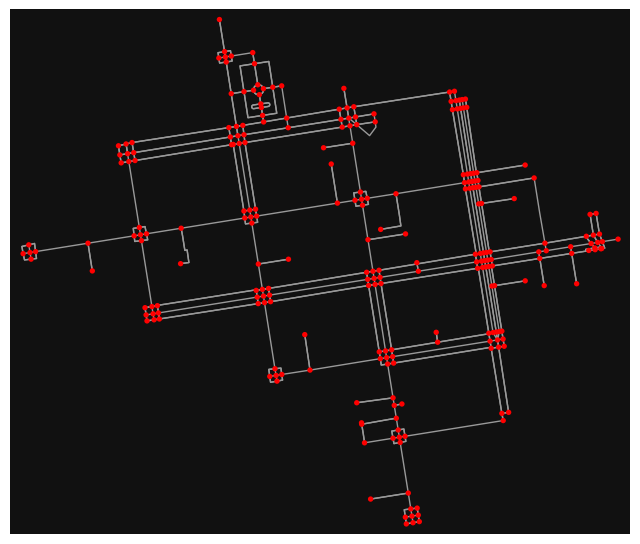

In [11]:
# same point again, but create network only of nodes within 500m along the network from point
G = ox.graph_from_point(location_point, dist=500, dist_type="network")
fig, ax = ox.plot_graph(G, node_color="r")

In [18]:
import matplotlib.pyplot as plt
query = "Chuuouku,Saitama,Saitama,Japan"

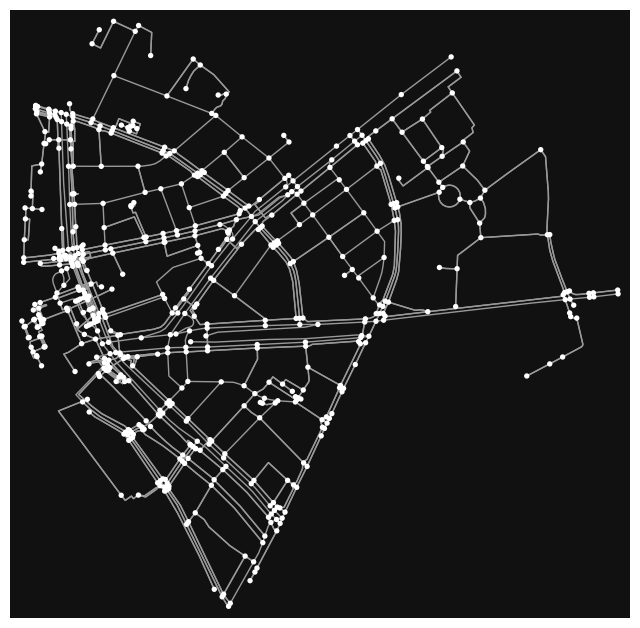

In [27]:
query = "渋谷, 東京, 日本"
G = ox.graph_from_place(query)
# ネットワークをプロット
ox.plot_graph(G)
plt.show()

In [4]:
place = "渋谷, 東京, 日本"

In [5]:
G = ox.graph_from_place(place, network_type="drive")

In [6]:
# get n evenly-spaced colors from some matplotlib colormap
ox.plot.get_colors(n=5, cmap="plasma")

[(0.050383, 0.029803, 0.527975, 1.0),
 (0.494877, 0.01199, 0.657865, 1.0),
 (0.798216, 0.280197, 0.469538, 1.0),
 (0.973416, 0.585761, 0.25154, 1.0),
 (0.940015, 0.975158, 0.131326, 1.0)]

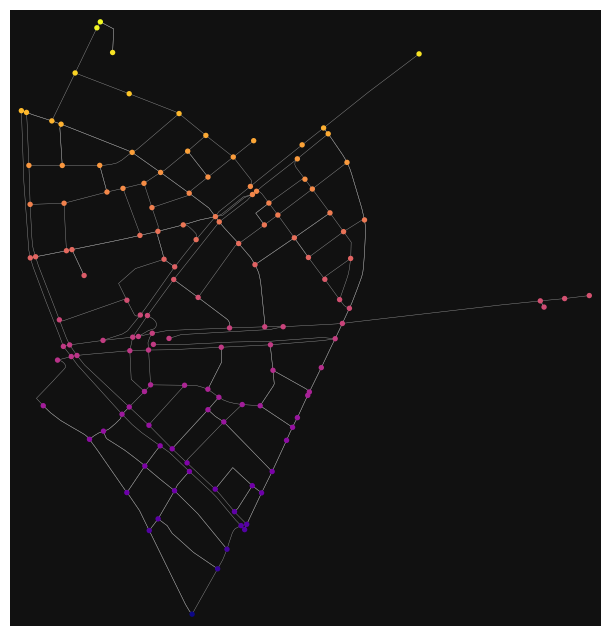

In [7]:

# get n evenly-spaced colors from some matplotlib colormap
ox.plot.get_colors(n=5, cmap="plasma")
# get node colors by linearly mapping an attribute's values to a colormap
nc = ox.plot.get_node_colors_by_attr(G, attr="y", cmap="plasma")
fig, ax = ox.plot_graph(G, node_color=nc, edge_linewidth=0.3)

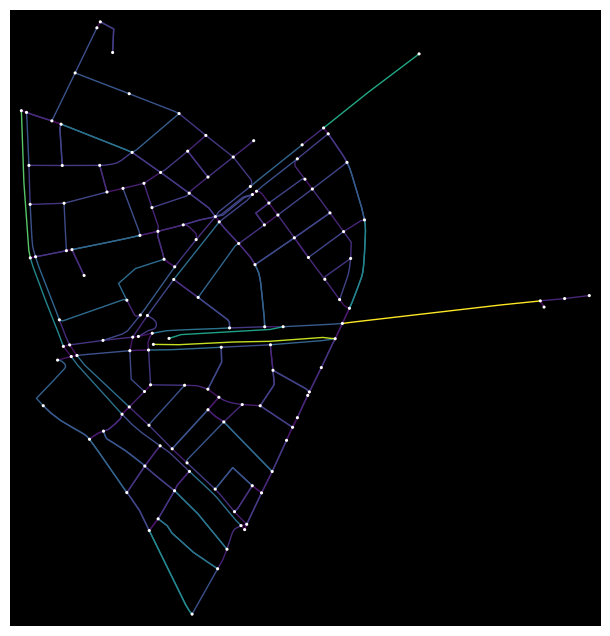

In [8]:

# when num_bins is not None, bin the nodes/edges then assign one color to each bin
# also set equal_size=True for equal-sized quantiles (requires unique bin edges!)
ec = ox.plot.get_edge_colors_by_attr(G, attr="length", num_bins=5)

# otherwise, when num_bins is None (default), linearly map one color to each node/edge by value
ec = ox.plot.get_edge_colors_by_attr(G, attr="length")

# plot the graph with colored edges
fig, ax = ox.plot_graph(G, node_size=5, edge_color=ec, bgcolor="k")

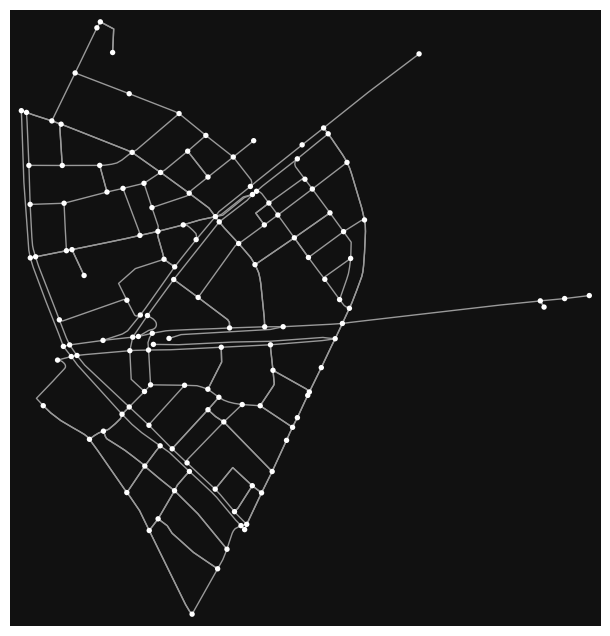

In [9]:
fig, ax = ox.plot_graph(
    G,
    ax=None,  # optionally draw on pre-existing axis
    figsize=(8, 8),  # figure size to create if ax is None
    bgcolor="#111111",  # background color of the plot
    node_color="w",  # color of the nodes
    node_size=15,  # size of the nodes: if 0, skip plotting them
    node_alpha=None,  # opacity of the nodes
    node_edgecolor="none",  # color of the nodes' markers' borders
    node_zorder=1,  # zorder to plot nodes: edges are always 1
    edge_color="#999999",  # color of the edges
    edge_linewidth=1,  # width of the edges: if 0, skip plotting them
    edge_alpha=None,  # opacity of the edges
    show=True,  # if True, call pyplot.show() to show the figure
    close=False,  # if True, call pyplot.close() to close the figure
    save=False,  # if True, save figure to disk at filepath
    filepath=None,  # if save is True, the path to the file
    dpi=300,  # if save is True, the resolution of saved file
    bbox=None,  # bounding box to constrain plot
)

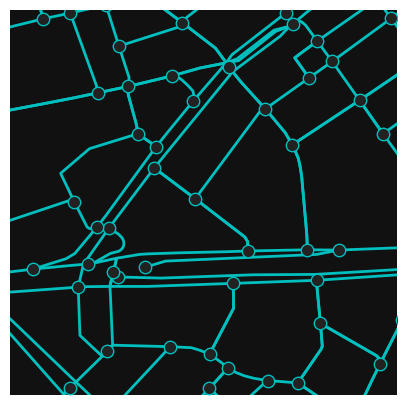

In [10]:
Gc = ox.consolidate_intersections(ox.project_graph(G), dead_ends=True)
c = ox.graph_to_gdfs(G, edges=False).unary_union.centroid
bbox = ox.utils_geo.bbox_from_point(point=(c.y, c.x), dist=200, project_utm=True)
fig, ax = ox.plot_graph(
    Gc,
    figsize=(5, 5),
    bbox=bbox,
    edge_linewidth=2,
    edge_color="c",
    node_size=80,
    node_color="#222222",
    node_edgecolor="c",
)

In [24]:
# impute missing edge speeds and calculate free-flow travel times
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

# calculate 3 shortest paths, minimizing travel time
w = "travel_time"
orig, dest = list(G)[10], list(G)[-10]
route1 = ox.shortest_path(G, orig, dest, weight=w)
orig, dest = list(G)[0], list(G)[-1]
route2 = ox.shortest_path(G, orig, dest, weight=w)
orig, dest = list(G)[-100], list(G)[100]
route3 = ox.shortest_path(G, orig, dest, weight=w)

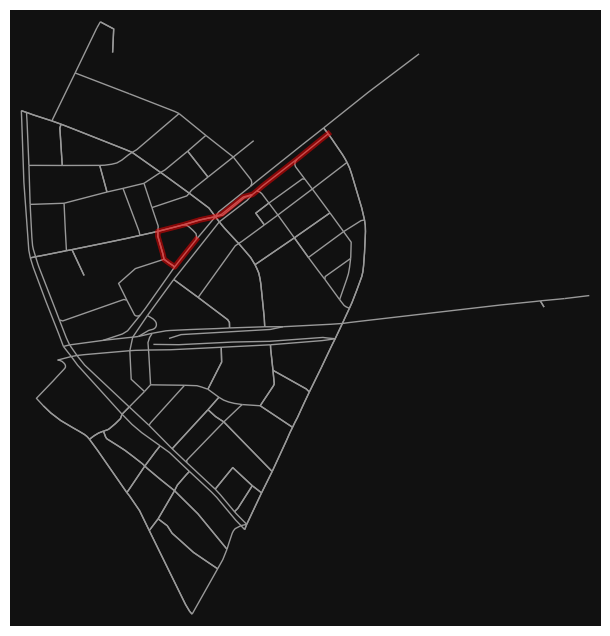

In [12]:
fig, ax = ox.plot_graph_route(G, route1, orig_dest_size=0, node_size=0)

In [13]:
# you can also pass any ox.plot_graph parameters as additional keyword args
fig, ax = ox.plot_graph_route(G, route1, save=True, show=False, close=True)

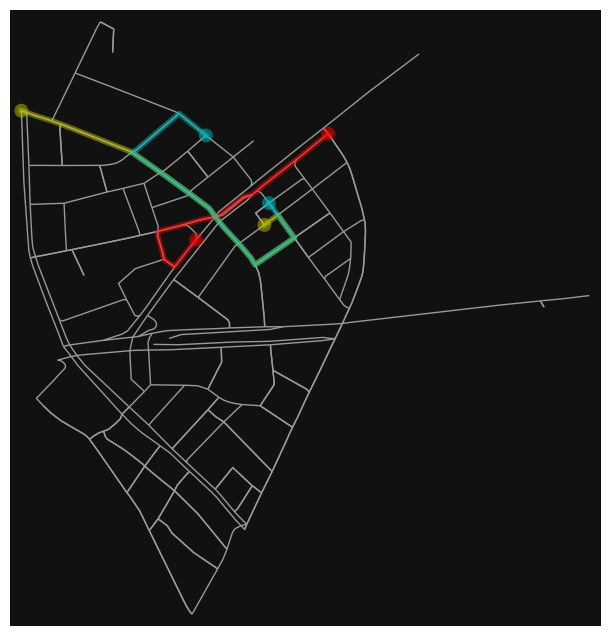

In [14]:
routes = [route1, route2, route3]
rc = ["r", "y", "c"]
fig, ax = ox.plot_graph_routes(G, routes, route_colors=rc, route_linewidth=6, node_size=0)

In [15]:

G2 = ox.graph_from_address(place, dist=200, network_type="drive")
G2 = ox.convert.to_undirected(G2)

In [18]:
from matplotlib import rcParams
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Meiryo"]

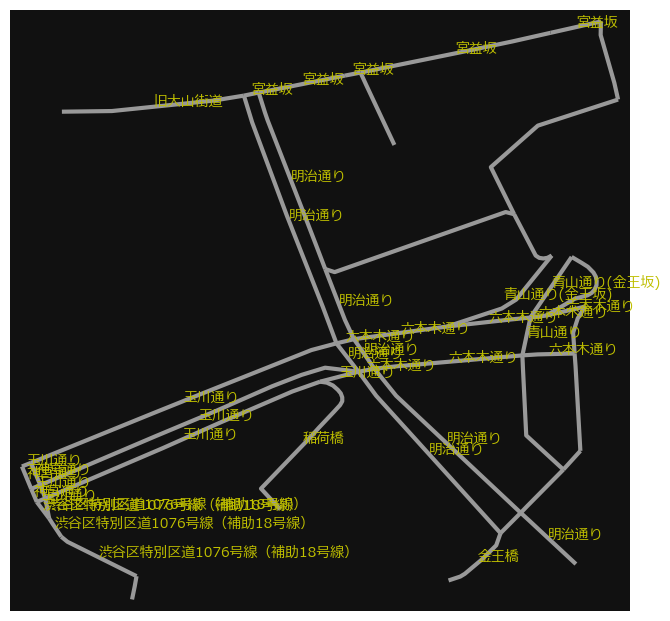

In [19]:
fig, ax = ox.plot_graph(G2, edge_linewidth=3, node_size=0, show=False, close=False)
for _, edge in ox.graph_to_gdfs(G2, nodes=False).fillna("").iterrows():
    text = edge["name"]
    c = edge["geometry"].centroid
    ax.annotate(text, (c.x, c.y), c="y")
plt.show()

In [21]:
# get all the building footprints in a city
gdf = ox.features_from_place(place, {"building": True})
gdf.shape

(833, 96)

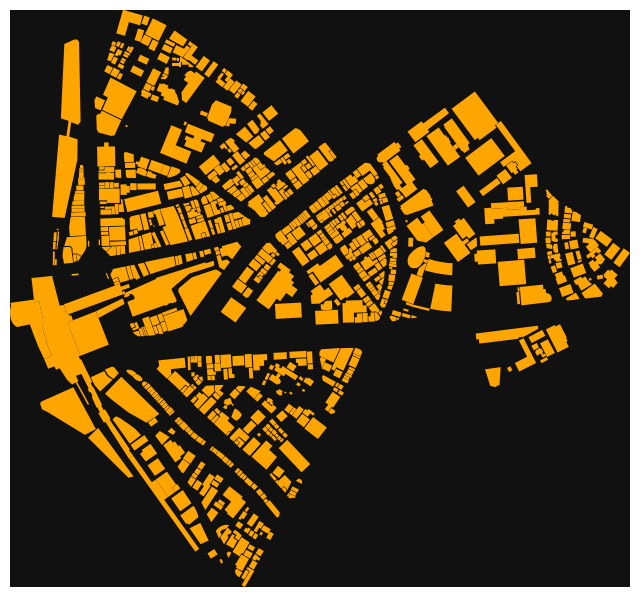

In [22]:
fig, ax = ox.plot_footprints(gdf)

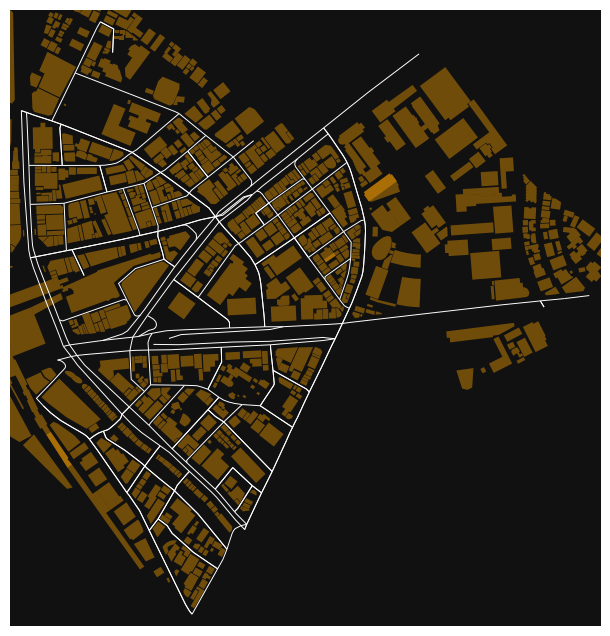

In [23]:
# or plot street network and the geospatial features' footprints together
fig, ax = ox.plot_footprints(gdf, alpha=0.4, show=False)
fig, ax = ox.plot_graph(G, ax=ax, node_size=0, edge_color="w", edge_linewidth=0.7)

In [37]:
place = "渋谷, 東京, 日本"
G = ox.graph_from_place(place)

In [40]:
start_point = (35.65829536423928, 139.70163580810402)
start_node = ox.distance.nearest_nodes(G, start_point[1], start_point[0])
end_point = (35.65495728145334, 139.69494603459512)
end_node = ox.distance.nearest_nodes(G, end_point[1], end_point[0])

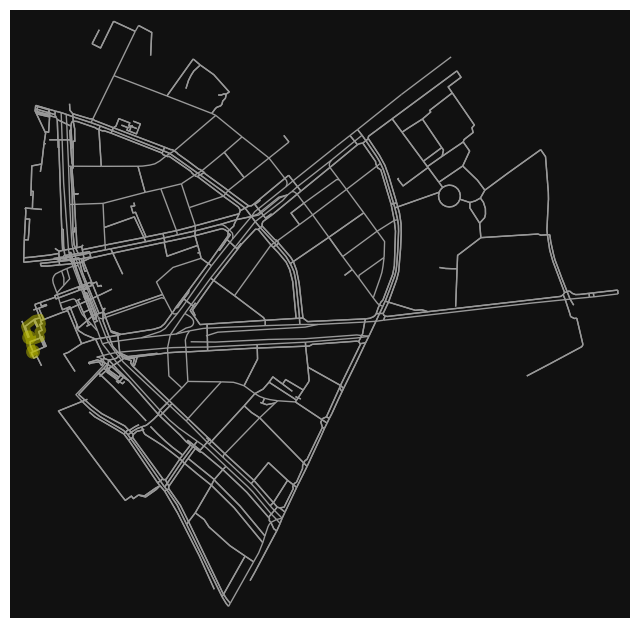

In [41]:
# 最短経路を取得します
route = ox.shortest_path(G, start_node, end_node)

# ルートを表示します
fig, ax = ox.plot_graph_route(G, route, route_color='y', route_linewidth=6, node_size=0)
plt.show()

c:\git\turn_lefter\winenv\Lib\site-packages\osmnx\graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


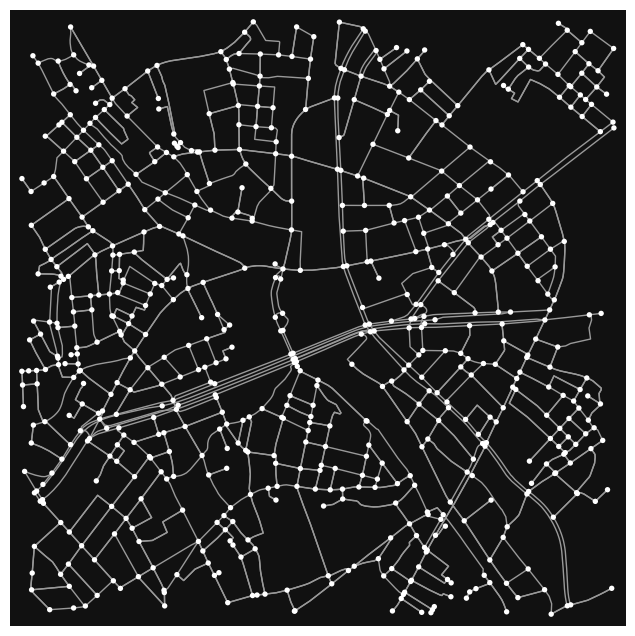

In [46]:
shibuya_eki = (35.65829536423928, 139.70163580810402)
dist = 800  # meters
G = ox.graph_from_point(shibuya_eki, dist, network_type="drive")
fig, ax = ox.plot_graph(G)

In [47]:
start_point = (35.65829536423928, 139.70163580810402)
start_node = ox.distance.nearest_nodes(G, start_point[1], start_point[0])
end_point = (35.65495728145334, 139.69494603459512)
end_node = ox.distance.nearest_nodes(G, end_point[1], end_point[0])

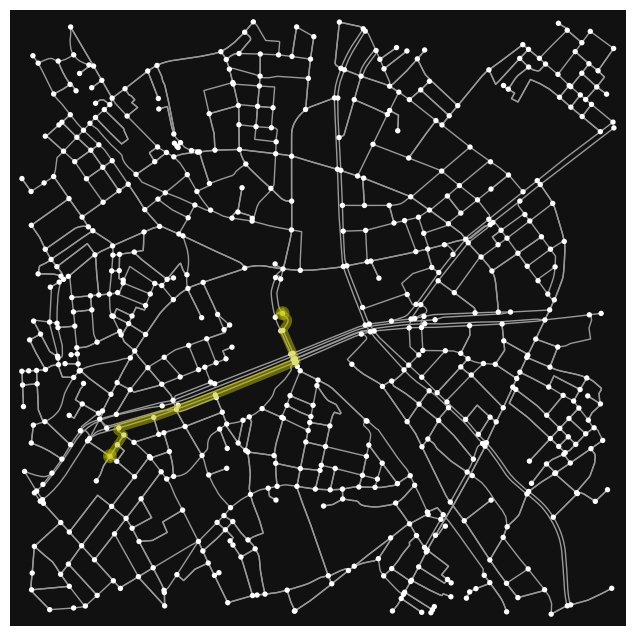

In [51]:
# 最短経路を取得します
route = ox.shortest_path(G, start_node, end_node)

# ルートを表示します
fig, ax = ox.plot_graph_route(G, route, route_color='y', route_linewidth=6)